In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# AdvisorSmith Cost of Living Index

"In the table below, we list the cost of living in over 500 U.S. metro areas. The cities are indexed to 100, with 100 being the average cost of living for the United States. Index values above 100 indicate that the city has a cost of living above the average, while values below 100 indicate a cost of living below the average.

For example, a city with a cost of living of 130 has a cost of living 30% higher than the national average."

In [7]:
#read in CSV file for Cost of Living Index by City/State

cost_of_living_df = pd.read_csv("advisorsmith_cost_of_living_index.csv")

cost_of_living_df

,City,State,Cost of Living Index
0,Abilene,TX,89.1
1,Adrian,MI,90.5
2,Akron,OH,89.4
3,Alamogordo,NM,85.8
4,Albany,GA,87.3
...,...,...,...
505,Wheeling,WV,84.1
506,New London,CT,105.9
507,Daphne,AL,96.6
508,Victoria,TX,89.5


In [8]:
#Sort by lowest cost of living 
cost_of_living_df_sorted = cost_of_living_df.sort_values(by="Cost of Living Index")

# Display DataFrame
cost_of_living_df_sorted

,City,State,Cost of Living Index
39,Beckley,WV,80.0
49,Bluefield,WV,81.2
294,Muskogee,OK,81.3
263,Marion,IN,81.8
273,Meridian,MS,82.0
...,...,...,...
210,Kahului,HI,158.5
383,Santa Cruz,CA,163.9
215,Kapaa,HI,164.9
380,San Jose,CA,173.5


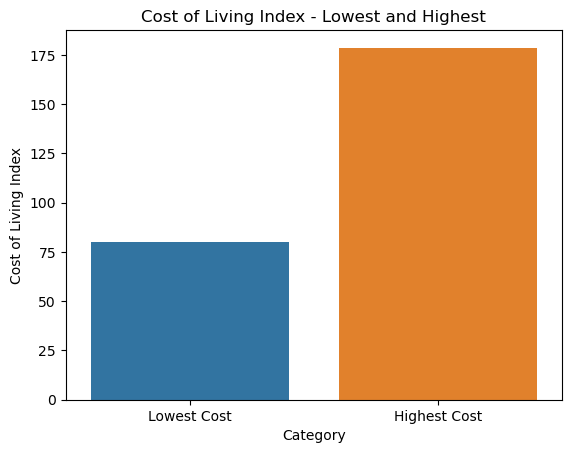

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by "Cost of Living Index"
cost_of_living_df_sorted = cost_of_living_df.sort_values(by="Cost of Living Index")

# Extract the highest and lowest entries
lowest_cost_entry = cost_of_living_df_sorted.iloc[0]
highest_cost_entry = cost_of_living_df_sorted.iloc[-1]

# Create a bar graph using Seaborn
sns.barplot(x=['Lowest Cost', 'Highest Cost'], y=[lowest_cost_entry['Cost of Living Index'], highest_cost_entry['Cost of Living Index']])
plt.title('Cost of Living Index - Lowest and Highest')
plt.xlabel('Category')
plt.ylabel('Cost of Living Index')
plt.show()

/var/folders/pc/lh7ggrp50991f9d12_27lnl40000gn/T/ipykernel_13139/253520230.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='State', y='Cost of Living Index', data=city_summary_df, ci='sd', capsize=0.2, palette='viridis')


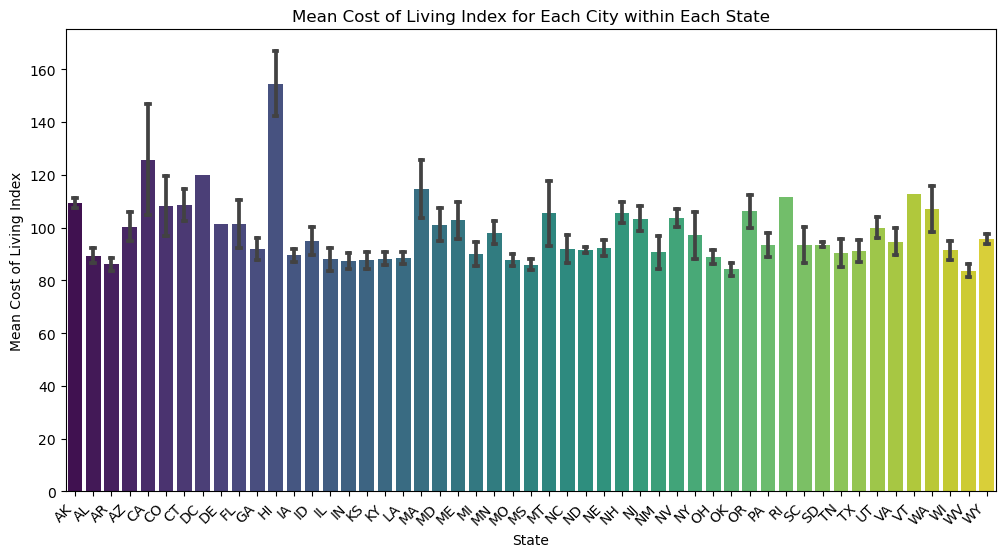

In [12]:
# Group by 'State' and calculate mean and count for each city
city_summary_df = cost_of_living_df.groupby(['State', 'City']).agg({'Cost of Living Index': 'mean'}).reset_index()

# Create a bar plot including the standard deviation for mean cost of living using Seaborn, providing 
# the variability or spread of the mean cost of living index values for each city within each state.
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Cost of Living Index', data=city_summary_df, ci='sd', capsize=0.2, palette='viridis')
plt.title('Mean Cost of Living Index for Each City within Each State')
plt.xlabel('State')
plt.ylabel('Mean Cost of Living Index')
plt.xticks(rotation=45, ha='right')  
plt.show()

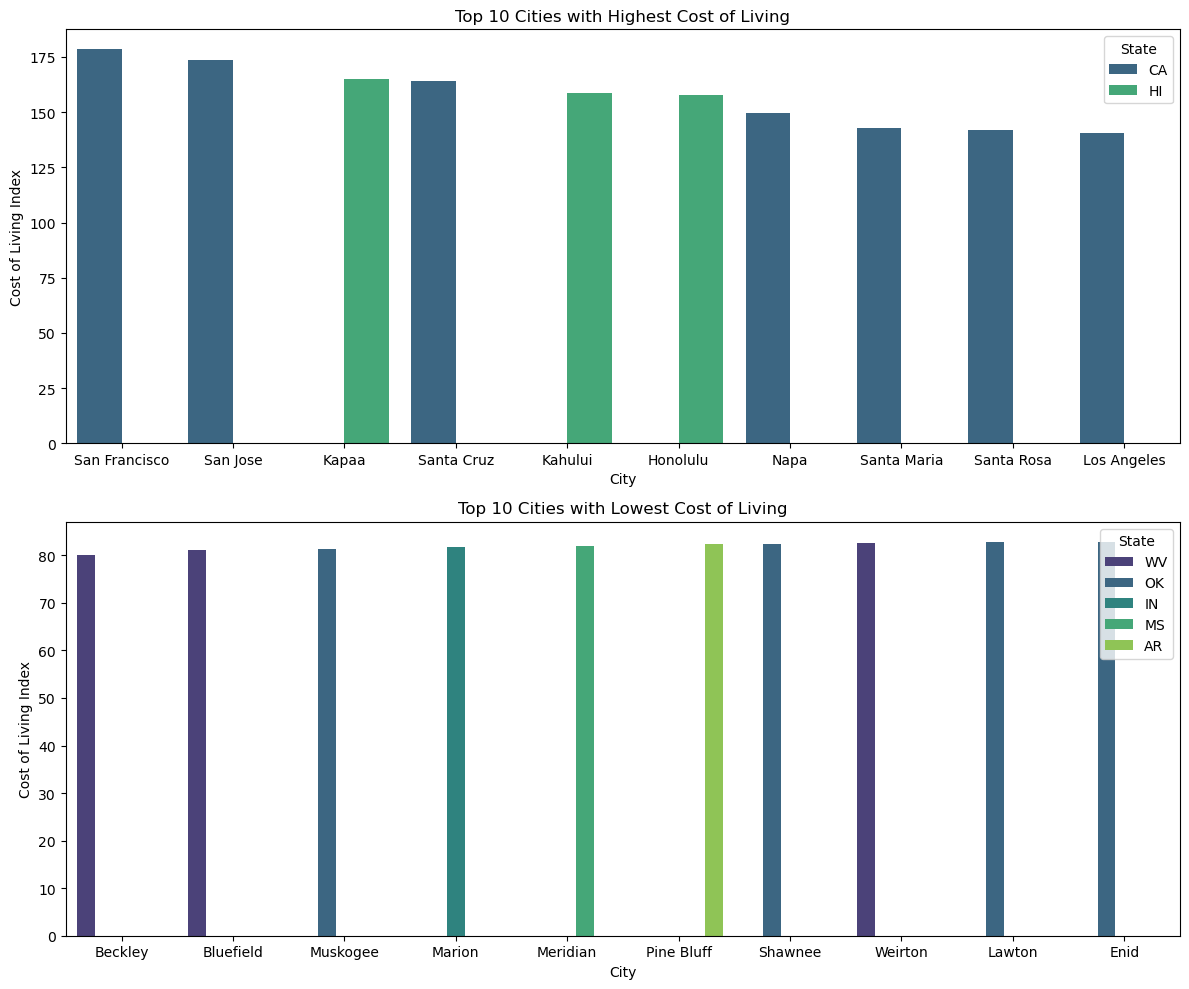

In [14]:
# Sort the DataFrame by "Cost of Living Index" in descending order for highest cost
highest_cost_cities_df = cost_of_living_df.sort_values(by="Cost of Living Index", ascending=False).head(10)

# Sort the DataFrame by "Cost of Living Index" in ascending order for lowest cost
lowest_cost_cities_df = cost_of_living_df.sort_values(by="Cost of Living Index").head(10)

# Create subplots for the bar plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot for highest cost cities
sns.barplot(ax=axes[0], x='City', y='Cost of Living Index', hue='State', data=highest_cost_cities_df, palette='viridis')
axes[0].set_title('Top 10 Cities with Highest Cost of Living')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Cost of Living Index')

# Plot for lowest cost cities
sns.barplot(ax=axes[1], x='City', y='Cost of Living Index', hue='State', data=lowest_cost_cities_df, palette='viridis')
axes[1].set_title('Top 10 Cities with Lowest Cost of Living')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Cost of Living Index')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [17]:
lowest_cost_cities_df.to_csv("lowest_cost_cities_ranking.csv", index=False)

In [ ]:
3